In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2019_up1/2019_up1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_up1/2019_up1_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_up1/2019_up1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_up1/2019_up1_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [14]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [15]:
article_contents = tokenized_doc.values.tolist()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [17]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [18]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [19]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [20]:
word2id = defaultdict(lambda: 0)

In [21]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [22]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [23]:
len(tf_idf_result)

9839

In [24]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

9839


In [25]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [26]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"scouser" + 0.000*"preagreed" + 0.000*"wada" + 0.000*"plaform" + 0.000*"advert" + 0.000*"saclay" + 0.000*"bitcoinmining" + 0.000*"juergen"')
(1, '0.000*"uptrending" + 0.000*"megg" + 0.000*"sink" + 0.000*"factory" + 0.000*"discontent" + 0.000*"topple" + 0.000*"turnover" + 0.000*"recourse"')
(2, '0.000*"micali" + 0.000*"unfreeze" + 0.000*"amateurish" + 0.000*"handshake" + 0.000*"calculator" + 0.000*"krautwald" + 0.000*"kyungjae" + 0.000*"intel"')
(3, '0.000*"onto" + 0.000*"oversight" + 0.000*"powder" + 0.000*"generous" + 0.000*"commentator" + 0.000*"underperformance" + 0.000*"operational" + 0.000*"reel"')


In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [28]:
sentences = article_contents

In [29]:
from gensim.models import Word2Vec

In [30]:
model = Word2Vec(sentences, min_count=1)

In [31]:
len(model.wv.vocab)

9839

In [32]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [33]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [34]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [35]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [36]:
temp_cluster_result['cluster'] = assigned_clusters

In [37]:
temp_cluster_result['raw_data'] = X.tolist()

In [38]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [39]:
from sklearn.metrics import pairwise_distances

In [40]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [41]:
len(cosine_centroid_list)

9839

In [42]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [43]:
sum(temp_distance[3])

1527.6655991919297

In [44]:
import scipy.spatial.distance as dist

In [45]:
dist.cosine(X[0],cosine_centroid_list[0])

0.04637192262740131

In [46]:
dist.euclidean(X[0],cosine_centroid_list[0])

6.2149887579572605

In [47]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [48]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [49]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(30)  # 긍정적 감정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[0.8153506517410278, 0.03053823672235012, 0.48...",market,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.015907,0.207395,0.808512,NaN
17,"[0.9832810163497925, 0.049728333950042725, 0.4...",price,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.029031,0.198933,0.830098,NaN
5,"[0.7537205815315247, -0.017762260511517525, 0....",trade,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.027665,0.185855,0.841809,NaN
1,"[0.7716109156608582, -0.006425734143704176, 0....",time,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.016760,0.158008,0.858752,NaN
6,"[0.9355649948120117, 0.05396268889307976, 0.43...",high,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.029328,0.119698,0.909629,NaN
62,"[0.6443675756454468, 0.13745996356010437, 0.70...",year,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.011441,0.089543,0.921899,NaN
178,"[0.7526896595954895, 0.14389747381210327, 0.69...",coin,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.020906,0.087543,0.933363,NaN
246,"[0.7861674427986145, 0.28210484981536865, 0.65...",support,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.012794,0.078927,0.933867,NaN
214,"[0.8193984031677246, 0.047567058354616165, 0.5...",week,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.012353,0.072465,0.939888,NaN
10,"[0.704330563545227, 0.08782722800970078, 0.582...",month,0,"[0.15771532, 0.035668608, 0.12821446, -0.01157...",0.002398,0.061080,0.941318,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
16,"[0.586501955986023, 0.2408975213766098, 0.7901...",bitcoin,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.004037,0.452330,0.551707,NaN
2,"[0.6304060816764832, 0.19884885847568512, 0.69...",cryptocurrency,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.009108,0.187086,0.822022,NaN
35,"[0.646621584892273, 0.1743783950805664, 0.7452...",report,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.010556,0.127852,0.882704,NaN
22,"[0.6745458841323853, 0.21866798400878906, 0.78...",cryptocurrencies,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.006387,0.078773,0.927614,NaN
91,"[0.6508237719535828, 0.30846869945526123, 0.90...",take,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.000574,0.065080,0.935494,NaN
15,"[0.6900961399078369, 0.1658988744020462, 0.719...",accord,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.014613,0.072773,0.941841,NaN
27,"[0.6627132296562195, 0.20344462990760803, 0.79...",data,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.005614,0.057541,0.948073,NaN
210,"[0.6376051902770996, 0.2871898412704468, 0.820...",first,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.000282,0.046772,0.953511,NaN
891,"[0.5954132676124573, 0.27243947982788086, 0.79...",future,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.007699,0.052464,0.955235,NaN
103,"[0.6361563205718994, 0.18903057277202606, 0.65...",value,1,"[0.0656581, 0.029820621, 0.085435346, -0.00287...",0.011703,0.053695,0.958008,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
143,"[0.5268669724464417, 0.3755251169204712, 0.991...",crypto,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.022094,0.212472,0.809622,NaN
32,"[0.5186242461204529, 0.28596433997154236, 0.94...",exchange,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.029665,0.190471,0.839194,NaN
166,"[0.5823754668235779, 0.42165470123291016, 1.08...",make,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.008264,0.098774,0.909490,NaN
174,"[0.5558013319969177, 0.46532148122787476, 1.17...",user,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.040618,0.114621,0.925997,NaN
745,"[0.5458104610443115, 0.36195114254951477, 0.97...",transaction,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.013139,0.082619,0.930520,NaN
125,"[0.5138449668884277, 0.4610828161239624, 1.145...",company,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.041164,0.104928,0.936236,NaN
60,"[0.5228776931762695, 0.4864640533924103, 1.175...",blockchain,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.043813,0.105082,0.938731,NaN
109,"[0.5816733837127686, 0.33870387077331543, 0.92...",investor,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.001093,0.060003,0.941090,NaN
52,"[0.6199450492858887, 0.35433465242385864, 1.01...",mine,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.002053,0.059541,0.942511,NaN
151,"[0.5274742841720581, 0.24693237245082855, 0.75...",asset,2,"[0.06840106, 0.041701104, 0.11029461, -0.00161...",0.025668,0.081081,0.944587,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5752,"[-0.010755532421171665, -0.003288423642516136,...",unconvinced,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.101223,0.000154,1.101069,NaN
959,"[-0.005283839534968138, 0.000396772229578346, ...",btcb,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.112440,0.000615,1.111825,NaN
3531,"[-0.010496892035007477, -0.0029935745988041162...",handpicks,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.215924,0.000154,1.215770,NaN
2585,"[-0.0023161638528108597, -0.001858122646808624...",elkasstawi,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.280353,0.000154,1.280199,NaN
7185,"[0.0013405890204012394, -0.003943579737097025,...",undetected,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.317862,0.000154,1.317708,NaN
21,"[-0.008063875138759613, -0.010031228885054588,...",outshine,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.323250,0.000154,1.323096,NaN
9568,"[-0.0001942063245223835, 0.0021368875168263912...",mvis,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.394909,0.000154,1.394755,NaN
4222,"[-0.002225999254733324, -0.0013992211315780878...",pboc,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.407458,0.000154,1.407304,NaN
3919,"[0.002055342076346278, -0.0015232564182952046,...",forgery,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.431215,0.000154,1.431061,NaN
3150,"[-0.007745609153062105, -0.0019317468395456672...",pricey,3,"[-0.0018923146, -0.0011581158, -0.0022156553, ...",0.460248,0.000154,1.460094,NaN


In [53]:
y_km = temp_cluster_result['cluster'].values

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

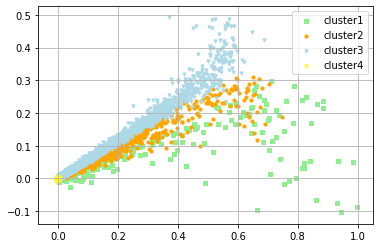

In [55]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 긍정적 감정

430

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈

2595

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

6762

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

52

In [60]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 1 # 긍정적
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 11 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [61]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [63]:
kmeans.inertia_

1345.4424658757184

In [64]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 3 3 ... 0 0 0]


In [65]:
cluster_values= list(model.wv.vocab)

In [66]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1345.4424


In [67]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [68]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.76330024


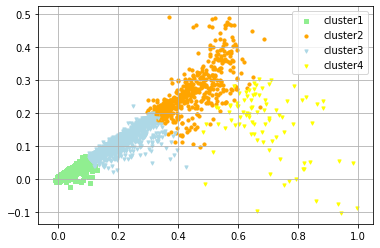

In [70]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [71]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [72]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [73]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [74]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [75]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [76]:
import scipy.spatial.distance as dist

In [77]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [78]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [79]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # Influencer활동

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7230,"[0.029347306117415428, 0.013234484940767288, 0...",scotland,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.025958,0.000308,1.025650,NaN
7596,"[0.022953199222683907, 0.013235624879598618, 0...",diesen,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.026331,0.000154,1.026178,NaN
6519,"[0.027788497507572174, 0.01738380640745163, 0....",overtake,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027336,0.000462,1.026874,NaN
8362,"[0.023870021104812622, 0.018918711692094803, 0...",simplicity,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027486,0.000308,1.027179,NaN
7572,"[0.028332430869340897, 0.01561648491770029, 0....",obwohl,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027438,0.000154,1.027284,NaN
6855,"[0.028399541974067688, 0.010158147662878036, 0...",parameter,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027670,0.000308,1.027362,NaN
5769,"[0.02288799360394478, 0.017878619953989983, 0....",fame,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027936,0.000462,1.027475,NaN
4754,"[0.028309578076004982, 0.013310285285115242, 0...",kline,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027857,0.000308,1.027549,NaN
4234,"[0.02589706890285015, 0.01457999087870121, 0.0...",nuanced,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.027872,0.000308,1.027564,NaN
2000,"[0.02434202842414379, 0.017791125923395157, 0....",siphon,0,"[0.025951602, 0.014404105, 0.038977265, -0.000...",0.028117,0.000462,1.027655,NaN


In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 투자, 긍정적 현상

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
72,"[0.4513902962207794, 0.2714305520057678, 0.714...",adoption,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.067496,0.016155,1.051341,NaN
1156,"[0.4337131381034851, 0.2670373022556305, 0.693...",concern,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.093482,0.015693,1.077788,NaN
2510,"[0.4379366934299469, 0.27334684133529663, 0.71...",stake,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.096066,0.015539,1.080526,NaN
1057,"[0.43209317326545715, 0.2614646255970001, 0.70...",deal,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.108470,0.014616,1.093854,NaN
304,"[0.4457249045372009, 0.2722030282020569, 0.711...",thing,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.117899,0.014001,1.103899,NaN
603,"[0.4436556398868561, 0.2809974253177643, 0.724...",clear,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.125131,0.017539,1.107592,NaN
1176,"[0.4286004602909088, 0.2658899426460266, 0.697...",space,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.133980,0.016616,1.117364,NaN
2719,"[0.43972426652908325, 0.25604766607284546, 0.6...",meet,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.131924,0.012462,1.119462,NaN
776,"[0.4498881995677948, 0.2706420421600342, 0.691...",head,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.135095,0.012616,1.122479,NaN
468,"[0.455933153629303, 0.2627950608730316, 0.6981...",potential,1,"[0.44610342, 0.2653519, 0.7085294, -0.01218939...",0.145217,0.016462,1.128755,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1437,"[0.1895843744277954, 0.10317862778902054, 0.28...",draw,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.036366,0.003846,1.032520,NaN
2016,"[0.19359515607357025, 0.105091892182827, 0.286...",michael,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.049490,0.003539,1.045952,NaN
1605,"[0.19792218506336212, 0.10275467485189438, 0.2...",natural,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.051065,0.004462,1.046603,NaN
858,"[0.20280638337135315, 0.10505478829145432, 0.2...",schedule,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.052526,0.004308,1.048218,NaN
5270,"[0.18839183449745178, 0.1100015938282013, 0.28...",lunch,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.053432,0.002769,1.050662,NaN
1692,"[0.18585890531539917, 0.11266802251338959, 0.2...",wrong,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.054450,0.003692,1.050758,NaN
843,"[0.19749516248703003, 0.09789633005857468, 0.2...",perform,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.057650,0.005385,1.052266,NaN
1033,"[0.18265540897846222, 0.09631345421075821, 0.2...",street,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.058434,0.004769,1.053665,NaN
3598,"[0.19865460693836212, 0.09959779679775238, 0.2...",burn,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.057551,0.002769,1.054782,NaN
5228,"[0.1928643435239792, 0.10585623234510422, 0.29...",france,2,"[0.19382285, 0.1046963, 0.28373367, -0.0060708...",0.059665,0.002616,1.057050,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
211,"[0.7021986246109009, 0.17984268069267273, 0.65...",early,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.357148,0.047233,1.309915,NaN
236,"[0.6523818373680115, 0.167708620429039, 0.5539...",close,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.348482,0.030925,1.317558,NaN
232,"[0.688507616519928, 0.2390577346086502, 0.6539...",next,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.480097,0.036156,1.443942,NaN
385,"[0.6815020442008972, 0.14243274927139282, 0.63...",today,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.485590,0.037233,1.448357,NaN
10,"[0.704330563545227, 0.08782722800970078, 0.582...",month,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.515334,0.061080,1.454254,NaN
88,"[0.6690226197242737, 0.25327399373054504, 0.62...",short,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.522752,0.029694,1.493058,NaN
452,"[0.6876117587089539, 0.20940114557743073, 0.70...",april,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.558857,0.041540,1.517317,NaN
303,"[0.6462405323982239, 0.2182914912700653, 0.605...",bear,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.549870,0.025540,1.524330,NaN
62,"[0.6443675756454468, 0.13745996356010437, 0.70...",year,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.670839,0.089543,1.581296,NaN
224,"[0.637739896774292, 0.19706088304519653, 0.530...",strong,3,"[0.6912742, 0.16504908, 0.59038657, -0.0514870...",0.624219,0.029078,1.595141,NaN


In [83]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #Influencer활동

8163

In [84]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #투자 긍정적 현상

475

In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #기술 긍정

1112

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

89

In [87]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 9 # 기술긍정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [88]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.76330024 
temp_cluster_result['Silhouette'] = 0.76330024

In [ ]:
temp_cluster_result1.to_csv("../cluster/en_news/2019_up1/en_news_2019_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2019_up1/en_news_2019_up1_cosine.csv")

In [85]:
word_vectors = model.wv

In [86]:
vocabs = word_vectors.vocab.keys()

In [87]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [88]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9583951


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [90]:
xys

array([[ 5.31194906e+00,  3.96651996e+00],
       [ 4.94564387e+00,  3.04198506e+00],
       [ 4.45940575e+00,  6.16612941e-01],
       ...,
       [-4.96989858e-01, -6.03174856e-03],
       [-5.36844166e-01, -3.20018782e-04],
       [-5.30862946e-01,  1.05598789e-02]])

In [91]:
xys[:,0]

array([ 5.31194906,  4.94564387,  4.45940575, ..., -0.49698986,
       -0.53684417, -0.53086295])

In [92]:
xys[:,1]

array([ 3.96651996e+00,  3.04198506e+00,  6.16612941e-01, ...,
       -6.03174856e-03, -3.20018782e-04,  1.05598789e-02])

In [93]:
xs = xys[:,0]
ys = xys[:,1]

In [94]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/pyt

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128678 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128721 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128678 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/pyt

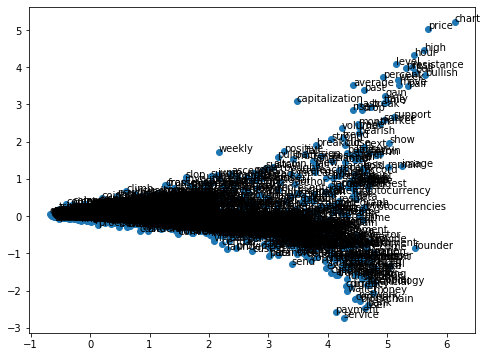

In [95]:
plot_2d_graph(vocabs,xs,ys)

In [96]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>